In [27]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.model_selection import GridSearchCV, StratifiedKFold  # , cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix  # , classification_report
import matplotlib.pyplot as plt 


In [38]:
DATA_PATH = './data/'
LIGHTCURVES_PATH = DATA_PATH + 'lightcurves/'
FEATURES_PATH = DATA_PATH + 'features/'
RED = DATA_PATH + "just_red/"

In [7]:
filename = 'sns_clean.pickle'
indir = LIGHTCURVES_PATH; filepath = indir + filename
sns = pd.read_pickle(filepath)
sns.shape

(186510, 4)

In [9]:
sns.head()

MJD BANDPASS      FLUX  FLUX_ERROR
ID   observation_id                                          
SN_0 0               53094.543        i   18.7260       2.064
     1               53094.586        r    7.3375       1.673
     2               53094.613        z    9.8390       9.255
     3               53109.492        i  125.7100       3.098
     4               53109.539        r  110.4600       2.639

In [11]:
just_red_sns = sns[sns["BANDPASS"] == 'r']

In [13]:
ids = just_red_sns.index.get_level_values("ID").unique()

In [18]:
ids = np.array(ids)

In [24]:
len(just_red_sns[just_red_sns.index.get_level_values("ID") == ids[1]])

6

In [25]:
num_points = []
for i in ids:
    num_points.append(len(just_red_sns[just_red_sns.index.get_level_values("ID") == i]))

Text(0.5,1,'Histogram of number of points in the lightcurve, filter R')

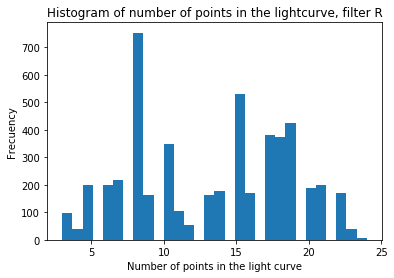

In [32]:
plt.hist(num_points,bins=30)
plt.xlabel("Number of points in the light curve")
plt.ylabel("Frecuency")
plt.title("Histogram of number of points in the lightcurve, filter R")

In [36]:
sum(np.array(num_points)<5)

138

In [39]:
sn_train = pd.read_pickle(RED + 'sn_just_red.pickle')

sn_train.shape

sn_test = pd.read_pickle(RED + "msn_just_red.pickle")

sn_test.shape

allnsn_small = pd.read_pickle(RED+"nsn_just_red.pickle")

allnsn_small.shape

(94054, 32)

In [41]:
all_train = pd.concat([allnsn_small.sample(5000),sn_train])

In [42]:
all_train.shape

(9862, 32)

In [45]:
all_train.head()

,,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly3_t3,poly4_t1,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k
ID,copy_num,BANDPASS,,,,,,,,,,,,,,,,,,,,,
186521,0,r,non-sn,12,2.852910,0.250000,0.100948,0.216216,0.339722,0.494392,0.709870,1.088290,...,3.262969e-07,-0.021585,-0.000016,6.341107e-07,1.511403e-09,0.657155,-4.033333,1.512946,0.022932,0.784388
174832,0,r,non-sn,16,1.707491,0.375000,0.066579,0.309854,0.415356,0.739989,0.881931,-0.675908,...,8.736722e-09,-0.000878,0.000002,8.805043e-09,-2.678141e-12,0.855323,-3.708791,1.134199,-0.312050,0.862222
117973,0,r,non-sn,73,7.479734,0.328767,0.169417,0.292286,0.356970,0.544552,0.788164,-0.307402,...,1.776995e-08,-0.002442,-0.000003,1.396748e-08,7.159062e-11,0.153607,-3.129175,3.265079,-0.325806,0.805449
229245,0,r,non-sn,10,2.613791,0.100000,0.049241,0.086675,0.262052,0.347176,0.488197,6.436209,...,-1.313545e-07,0.009900,0.000048,-3.056658e-07,3.632756e-10,2.297308,-4.339286,1.465207,-0.140479,0.608206
5938,0,r,non-sn,7,1.259203,0.428571,0.194737,0.350049,0.579439,0.808828,0.928993,-1.336608,...,1.646947e-08,-0.001271,-0.000006,1.420230e-08,7.447832e-11,0.245531,-5.400000,0.965889,-0.663814,0.898495


In [55]:
sn_test.shape

(125, 32)

Text(0.5,1,'Number of observations per light curve, R filter')

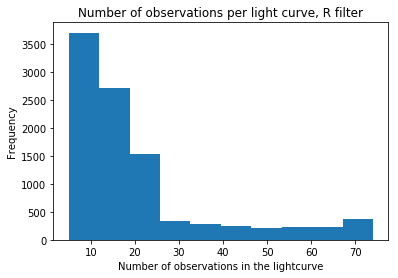

In [56]:
plt.hist(all_train["ObsCount"])
plt.xlabel("Number of observations in the lightcurve")
plt.ylabel("Frequency")
plt.title("Number of observations per light curve, R filter")